***Machine Learning - SPAM DETECTION - Prachika Agarwal(pa2191) and Pranjal Jain(pj2069)***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from google.colab import drive
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

#Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Importing dataset
# Data taken from these two sources and combined together and filtered to include 7793 samples:
# https://www.kaggle.com/code/syamkakarla/spam-mail-classifier/data
# https://github.com/omaarelsherif/Email-Spam-Detection-Using-Machine-Learning/tree/main/Dataset

# drive link for dataset - https://drive.google.com/file/d/1OuUCis-IZFpjJ3AvCip2WcGBQ61k_xrS/view?usp=sharing
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/emailspamdetection/'

# Reading the csv file and printing top 10 values
df = pd.read_csv(data_dir+'spam_emails.csv')
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
# Data Cleaning
# Reference for data cleaning - https://www.kaggle.com/code/syamkakarla/spam-mail-classifier

# Converting 
df = df.astype({'text' : str})
df.drop('Unnamed', axis = 1, inplace = True)

# Remove Duplicates
df.drop_duplicates(inplace = True)
print(df.shape)

# Check and remove null values
df = df.dropna()
print(df.isnull().sum())

# Remove stopwords and punctuations, print top 10 records 
stop_word = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join ([word for word in x.split() if word not in (stop_word)]))
df['text'] = df['text'].str.replace('[^\w\s]','')
df.head(10)

(7793, 3)
label        0
text         0
label_num    0
dtype: int64


,label,text,label_num
0,ham,Subject enron methanol meter 988291 follow ...,0
1,ham,Subject hpl nom january 9 2001 see attached ...,0
2,ham,Subject neon retreat ho ho ho around wonderf...,0
3,spam,Subject photoshop windows office cheap mai...,1
4,ham,Subject indian springs deal book teco pvr rev...,0
5,ham,Subject ehronline web address change message i...,0
6,ham,Subject spring savings certificate take 30 s...,0
7,spam,Subject looking medication best source diff...,1
8,ham,Subject noms actual flow 2 26 agree ...,0
9,ham,Subject nominations oct 21 23 2000 see att...,0


In [ ]:
# Define X and y values
X = df['text']
y = df['label_num']

#Getting the max no of characters in an email
max_value_column = df['text'].str.len().max()
print(max_value_column)

26305


In [ ]:
# Splitting and reshaping training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)

# Flattening input data
X_train = X_train.values.ravel()
X_test = X_test.values.ravel()
y_train = y_train.values.ravel()

In [ ]:
# Library used for Refernced - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# Using CountVertorizer to convert train samples
data_tr = X_train
vectorizer = CountVectorizer()
X_true_tr = vectorizer.fit_transform(data_tr.ravel()).toarray()
print(X_true_tr.sum())

# Using CountVertorizer to convert test samples
data_ts = X_test
X_true_ts = vectorizer.transform(data_ts).toarray()
print(X_true_ts.sum())

848374
201080


In [ ]:
# Guassian Multinomial Naive Bayes Classifier
# Library used for Refernced - https://scikit-learn.org/stable/modules/naive_bayes.html

# Calling the classifier
classifier_NB = GaussianNB()

# Fitting the data
classifier_NB.fit(X_true_tr, y_train)

# Predicting the y values from X_true_ts
y_pred = classifier_NB.predict(X_true_ts)

In [ ]:
# Print metrics for Naive Bayes

# Confusion matrix
cm_NB = confusion_matrix(y_test, y_pred)
cm_NB = cm_NB/cm_NB.astype(float).sum(axis = 1)
print('Confusion matrix')
print(cm_NB)

# Accuracy score
acc_NB = accuracy_score(y_test, y_pred)
print('Accuracy score')
print(acc_NB)

# Classification Report
classreport_NB = classification_report(y_test,y_pred)
print('Classification Report')
print(classreport_NB)

# Mean Squared Error
mse_NB = np.square(np.subtract(y_test,y_pred)).mean()
print('Mean squared error')
print(mse_NB)

Confusion matrix
[[0.97643362 0.1048951 ]
 [0.03142184 0.86013986]]
Accuracy score
0.9550994227068633
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1273
           1       0.89      0.86      0.88       286

    accuracy                           0.96      1559
   macro avg       0.93      0.92      0.92      1559
weighted avg       0.95      0.96      0.95      1559

Mean squared error
0.04490057729313662


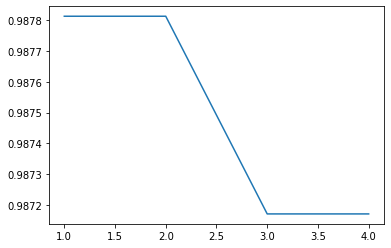

In [ ]:
# Logistic Regression
# Library used for Refernced - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

acc_log = []
y_pred_act = []
for i in range(1,5):
  # Calling the classifier
  logreg = LogisticRegression(solver = 'liblinear' , C = i)
  # Fitting the data
  logreg.fit(X_true_tr, y_train)
  # Predicting the y values from X_true_ts
  y_pred = logreg.predict(X_true_ts)
  # Calculating accuracy score for each C value
  acc = accuracy_score(y_test, y_pred)
  # Adding the accuracy score to a list
  acc_log.append(acc)
  # Storing the y_pred value for C with maximum accuracy
  if acc == max(acc_log):
    y_pred_act = y_pred

# Plotting C vs accuracy graph
plt.plot([1,2,3,4], acc_log)

In [ ]:
# Metrics of Logistic Regression

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_act)
cm_lr = cm_lr/cm_lr.astype(float).sum(axis = 1)
print('Confusion Matrix is')
print(cm_lr)

# Accuracy score
acc_lr = max(acc_log)
print('Accuracy is')
print(acc_lr)

# Classification Report
classreport_lr = classification_report(y_test, y_pred_act)
print('Classification Matrix is')
print(classreport_lr)

# Mean Squared Error
mse_lr = np.square(np.subtract(y_test, y_pred_act)).mean()
print('Mean squared error')
print(mse_lr)

Confusion Matrix is
[[0.99214454 0.03496503]
 [0.00706991 0.96853147]]
Accuracy is
0.9878127004490058
Classification Matrix is
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1273
           1       0.97      0.97      0.97       286

    accuracy                           0.99      1559
   macro avg       0.98      0.98      0.98      1559
weighted avg       0.99      0.99      0.99      1559

Mean squared error
0.012187299550994226


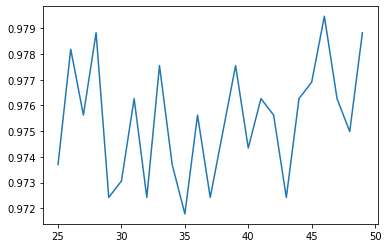

In [ ]:
# Random Forest
# Library used for Refernced - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

acc_log = []
y_pred_act = []
iterator = list(range(25,50))
for i in iterator:
  # Calling the classifier
  classifier_rf = RandomForestClassifier(n_estimators = i)
  # Fitting the data
  classifier_rf.fit(X_true_tr, y_train)
  # Predicting the y values from X_true_ts
  y_pred = classifier_rf.predict(X_true_ts)
  # Calculating accuracy score for each C value
  acc_i = accuracy_score(y_test, y_pred)
  # Adding the accuracy score to a list
  acc_log.append(acc_i)
  # Storing the y_pred value for n_estimator with maximum accuracy
  if acc_i == max(acc_log):
    y_pred_act = y_pred

# Plotting iterator vs accuracy graph
plt.plot(iterator, acc_log)

In [ ]:
# Random Forest Metrics

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_act)
cm_rf = cm_rf/cm_rf.astype(float).sum(axis = 1)
print('Confusion Matrix is')
print(cm_rf)

# Accuracy score
acc_rf = max(acc_log)
print('Accuracy is')
print(acc_rf)

# Classification Report
classreport_rf = classification_report(y_test, y_pred)
print('Classification Matrix is')
print(classreport_rf)

# Mean Squared Error
mse_rf = np.square(np.subtract(y_test, y_pred)).mean()
print('Mean Squared Error is')
print(mse_rf)

Confusion Matrix is
[[0.99214454 0.03496503]
 [0.01728201 0.92307692]]
Accuracy is
0.9794740218088518
Classification Matrix is
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1273
           1       0.96      0.92      0.94       286

    accuracy                           0.98      1559
   macro avg       0.97      0.96      0.96      1559
weighted avg       0.98      0.98      0.98      1559

Mean Squared Error is
0.021167415009621552
